(100000, 2) (427, 2)
Time for original convex hull: 0.019649 seconds
Time for filtered convex hull (with boundary points): 0.002508 seconds


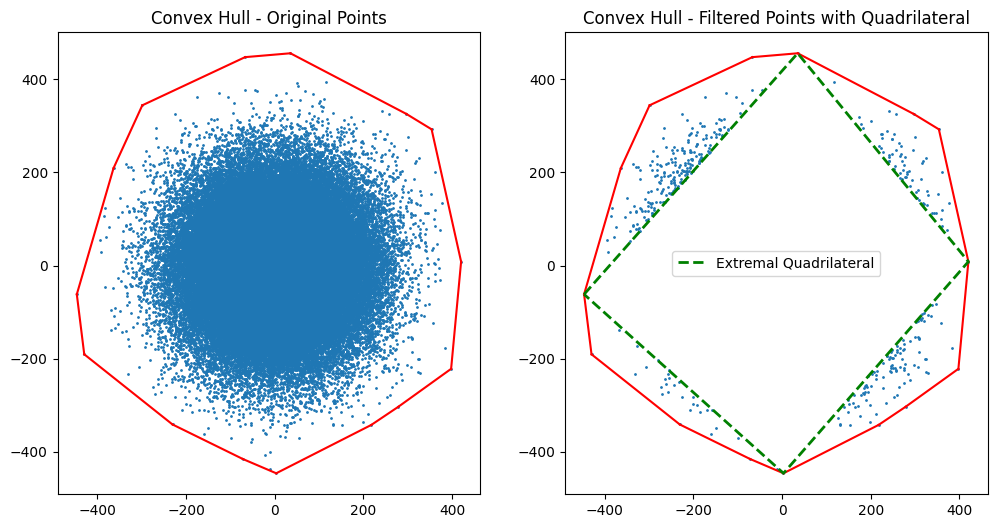

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import time

# Function to compute convex hull and return time taken
def compute_convex_hull(points):
    start_time = time.time()
    hull = ConvexHull(points)
    end_time = time.time()
    return hull, end_time - start_time

# Function to compute extremal points (xmin, xmax, ymin, ymax) from the point set
def compute_extremal_points(points):
    xmin_point = points[np.argmin(points[:, 0])]  # Point with minimum x
    xmax_point = points[np.argmax(points[:, 0])]  # Point with maximum x
    ymin_point = points[np.argmin(points[:, 1])]  # Point with minimum y
    ymax_point = points[np.argmax(points[:, 1])]  # Point with maximum y
    return xmin_point, xmax_point, ymin_point, ymax_point

def is_inside_convex_quad(point, quad_points):
    def cross_product(o, a, b):
        """ Returns the cross product of vector OA and OB
            A positive cross product indicates a left turn (counter-clockwise),
            a negative cross product indicates a right turn (clockwise)."""
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
    
    # Calculate cross products for each edge
    cross_products = [cross_product(quad_points[i], quad_points[(i+1) % 4], point) for i in range(4)]
    
    # Check if all cross products are non-negative or non-positive (point inside or on the boundary)
    return all(cp >= 0 for cp in cross_products) or all(cp <= 0 for cp in cross_products)


# Function to filter out points inside the quadrilateral
def filter_points_cross_product(points, quad_points):
    return np.array([p for p in points if not is_inside_convex_quad(p, quad_points)])

# Include the boundary points (extremal points) to the filtered set
def filter_points_with_boundary(points, quad_points):
    filtered = filter_points_cross_product(points, quad_points)
    # Include boundary points explicitly
    return np.vstack([filtered, quad_points])

# Generate random 2D points
np.random.seed(42)  # For reproducibility
points = np.random.randn(100000, 2) * 100  # 1000 random points in range (0, 100)

# Compute convex hull for the original set of points
hull_original, time_original = compute_convex_hull(points)

# Compute extremal points (xmin, xmax, ymin, ymax) from the point set
xmin_point, xmax_point, ymin_point, ymax_point = compute_extremal_points(points)

# Form the quadrilateral using these extremal points
quadrilateral = np.array([xmin_point, ymax_point, xmax_point, ymin_point])

# Filter points inside the quadrilateral using the cross-product method and include boundary points
filtered_points_quad_with_boundary = filter_points_with_boundary(points, quadrilateral)
print(points.shape, filtered_points_quad_with_boundary.shape)
# Compute convex hull for the filtered set of points including boundary points
hull_filtered_quad_with_boundary, time_filtered_quad_with_boundary = compute_convex_hull(filtered_points_quad_with_boundary)

# Print time results
print(f"Time for original convex hull: {time_original:.6f} seconds")
print(f"Time for filtered convex hull (with boundary points): {time_filtered_quad_with_boundary:.6f} seconds")

# Visualize the original convex hull
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(points[:,0], points[:,1], 'o', markersize=1)
for simplex in hull_original.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.title('Convex Hull - Original Points')

# Visualize the filtered convex hull and the quadrilateral
plt.subplot(1, 2, 2)
plt.plot(filtered_points_quad_with_boundary[:,0], filtered_points_quad_with_boundary[:,1], 'o', markersize=1)
for simplex in hull_filtered_quad_with_boundary.simplices:
    plt.plot(filtered_points_quad_with_boundary[simplex, 0], filtered_points_quad_with_boundary[simplex, 1], 'r-')

# Draw the quadrilateral
quad_x = np.append(quadrilateral[:, 0], quadrilateral[0, 0])
quad_y = np.append(quadrilateral[:, 1], quadrilateral[0, 1])
plt.plot(quad_x, quad_y, 'g--', linewidth=2, label='Extremal Quadrilateral')
plt.legend()
plt.title('Convex Hull - Filtered Points with Quadrilateral')

plt.show()


retained  1442
retained  1442
retained  223
retained  94
retained  67
retained  67
retained  67
retained  67
retained  59
retained  59
(10000, 2) (59, 2)
Time for original convex hull: 0.00644159 seconds
Time for filtered convex hull: 0.00701189 seconds
Combined time for filtered convex hull: 0.88712907 seconds


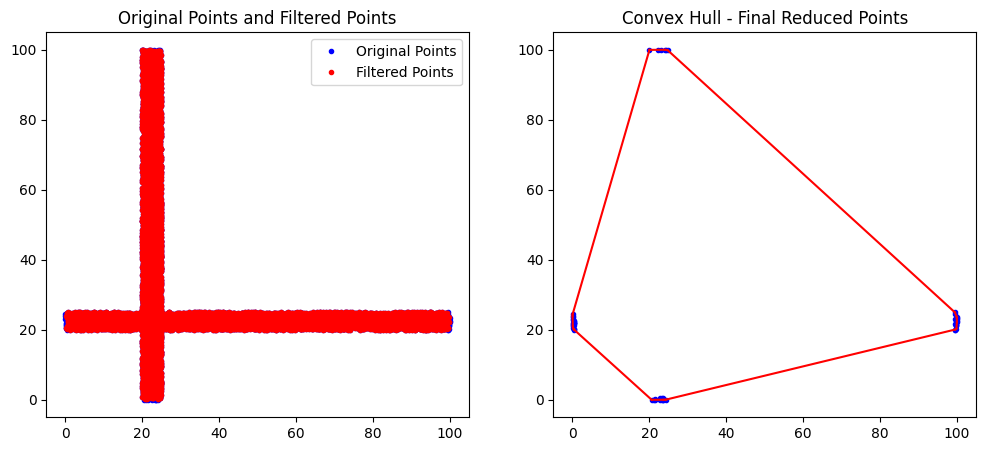

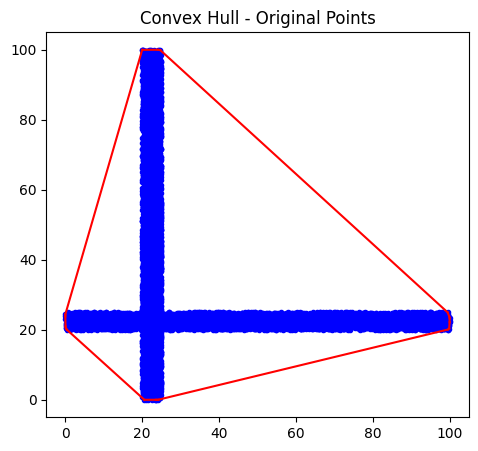

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import time

# Function to compute convex hull and return time taken
def compute_convex_hull(points):
    start_time = time.time()
    hull = ConvexHull(points)
    end_time = time.time()
    return hull, end_time - start_time

# Function to compute extremal points (xmin, xmax, ymin, ymax) from the point set
def compute_extremal_points(points):
    xmin_point = points[np.argmin(points[:, 0])]  # Point with minimum x
    xmax_point = points[np.argmax(points[:, 0])]  # Point with maximum x
    ymin_point = points[np.argmin(points[:, 1])]  # Point with minimum y
    ymax_point = points[np.argmax(points[:, 1])]  # Point with maximum y
    return xmin_point, xmax_point, ymin_point, ymax_point

# Function to check if a point is inside or on the boundary of a convex quadrilateral using cross product method
def is_inside_convex_quad(point, quad_points):
    def cross_product(o, a, b):
        """ Returns the cross product of vector OA and OB
            A positive cross product indicates a left turn (counter-clockwise),
            a negative cross product indicates a right turn (clockwise)."""
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
    
    # Calculate cross products for each edge
    cross_products = [cross_product(quad_points[i], quad_points[(i+1) % 4], point) for i in range(4)]
    
    # Check if all cross products are non-negative or non-positive (point inside or on the boundary)
    return all(cp >= 0 for cp in cross_products) or all(cp <= 0 for cp in cross_products)

# Function to rotate points around a given center by an angle theta (in radians)
def rotate_points(points, theta):
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    
    # Translate points to the origin (center)
    translated_points = points
    
    # Apply the rotation
    rotated_points = np.dot(translated_points, rotation_matrix.T)
    
    # Translate back to the original center
    return rotated_points

# Function to perform successive rotations and filtering on the original point set using a boolean mask
def successive_rotations_and_filtering_with_mask(points, num_rotations=4, rotation_angle=np.pi/9):
    mask = np.ones(len(points), dtype=bool)  # Boolean mask to track which points are kept (True = keep, False = filtered out)

    # Perform multiple rotations and filtering
    for i in range(num_rotations):
        # Rotate the points by the specified angle
        rotated_points = rotate_points(points,  rotation_angle * (i + 1))
        
        # Compute the extremal points and form the quadrilateral in the rotated space
        xmin_point, xmax_point, ymin_point, ymax_point = compute_extremal_points(rotated_points)
        quadrilateral = np.array([xmin_point, ymax_point, xmax_point, ymin_point])
        
        # Identify the indices of the extremal points to ensure they are not filtered
        extremal_indices = [np.argmin(rotated_points[:, 0]), np.argmax(rotated_points[:, 0]),
                            np.argmin(rotated_points[:, 1]), np.argmax(rotated_points[:, 1])]

        # Filter the points using the rotated positions but apply the filter to the original points
        for j in range(len(points)):
            if is_inside_convex_quad(rotated_points[j], quadrilateral) and j not in extremal_indices:
                mask[j] = False  # Mark this point for filtering (removal)

        print("retained ", mask.sum())
    # Apply the mask to the original points to get the reduced set
    reduced_points = points[mask]
    return reduced_points, mask

def generate_spiral(num_points=1000, turns=5, radius=10):
    theta = np.linspace(0, turns * 2 * np.pi, num_points)
    r = np.linspace(0, radius, num_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.vstack((x, y)).T

def generate_random_walk(num_steps=1000):
    steps = np.random.choice([-1, 1], size=(num_steps, 2))  # Random steps in 2D
    return np.cumsum(steps, axis=0)

def generate_random_clusters(num_clusters=5, points_per_cluster=200, cluster_radius=10):
    points = []
    cluster_centers = np.random.rand(num_clusters, 2) * 1000  # Random cluster centers in the range [0, 100]
    
    for center in cluster_centers:
        # Generate points around the cluster center
        cluster_points = center + np.random.randn(points_per_cluster, 2) * cluster_radius
        points.append(cluster_points)
    
    return np.vstack(points)

def generate_l_shape(num_points=1000):
    l_shape = []
    # Vertical line segment
    vertical_segment = np.random.rand(num_points // 2, 2) * [5, 100]
    vertical_segment[:, 0] += 20  # Offset x to create an L shape
    l_shape.append(vertical_segment)

    # Horizontal line segment
    horizontal_segment = np.random.rand(num_points // 2, 2) * [100, 5]
    horizontal_segment[:, 1] += 20  # Offset y to create an L shape
    l_shape.append(horizontal_segment)

    return np.vstack(l_shape)

# Example usage
points = generate_random_clusters()


# Generate random 2D points
np.random.seed(42)  # For reproducibility
# points = np.random.randn(100000, 2) * 100  # 1000 random points in range (0, 100)
# points = generate_spiral(10000, 5, 100)
# points = generate_random_walk(10000)
# points = generate_random_clusters(100, 1000, 50)
points = generate_l_shape(10000)

hull_original, time_original = compute_convex_hull(points)

# Perform the successive rotations and filtering using a boolean mask
st = time.time()
num_rotations = 10  # Example: Rotate 4 times
final_reduced_points, final_mask = successive_rotations_and_filtering_with_mask(points, num_rotations=num_rotations)

print(points.shape, final_reduced_points.shape)
# Compute the final convex hull of the reduced points
final_hull, final_hull_time = compute_convex_hull(final_reduced_points)
et = time.time()
print(f"Time for original convex hull: {time_original:.8f} seconds")
print(f"Time for filtered convex hull: {final_hull_time:.8f} seconds")
print(f"Combined time for filtered convex hull: {et - st:.8f} seconds")

# Visualize the final reduced convex hull and the original point set with filtered points
plt.figure(figsize=(12, 5))

# Plot original points with filtered points marked in red
plt.subplot(1, 2, 1)
plt.plot(points[:, 0], points[:, 1], 'bo', markersize=3, label='Original Points')
plt.plot(points[~final_mask][:, 0], points[~final_mask][:, 1], 'ro', markersize=3, label='Filtered Points')
plt.legend()
plt.title('Original Points and Filtered Points')

# Plot the final convex hull of the reduced points
plt.subplot(1, 2, 2)
plt.plot(final_reduced_points[:, 0], final_reduced_points[:, 1], 'bo', markersize=3)
for simplex in final_hull.simplices:
    plt.plot(final_reduced_points[simplex, 0], final_reduced_points[simplex, 1], 'r-')
plt.title('Convex Hull - Final Reduced Points')

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(points[:, 0], points[:, 1], 'bo', markersize=3)
for simplex in hull_original.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.title('Convex Hull - Original Points')

plt.show()
